In [ ]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io

In [ ]:

# Importing the training set
from google.colab import files
uploaded = files.upload()


Saving Maha_1901-2015.csv to Maha_1901-2015.csv


In [ ]:
dataset_train = pd.read_csv(io.BytesIO(uploaded['Maha_1901-2015.csv']))
r = int(input())
if r == 1:
  i_val = r
elif r == 2:
  i_val = r
elif r == 3:
  i_val = r
elif r == 4:
  i_val = r
elif r == 5:
  i_val = r
training_set = dataset_train.iloc[0:1104, i_val:i_val+1].values

1


In [ ]:
dataset_train

,YEAR/MONTH,RAINFALL_KONKAN & GOA,RAINFALL_MADHYA MAHARASHTRA,RAINFALL_MARATHVADA,RAINFALL_VIDHARBA,RAINFALL_CHHATTISGARH
0,Jan-01,5.6,18.8,15.8,36.8,48.9
1,Feb-01,0.1,0.6,3.3,39.9,116.5
2,Mar-01,0.4,7.7,32.1,30.9,27.8
3,Apr-01,35.7,36.6,48.5,26.1,5.5
4,May-01,19.9,30.4,26.5,7.3,18.4
...,...,...,...,...,...,...
1375,Aug-15,377.3,67.2,112.2,288.9,286.6
1376,Sep-15,240.9,146.6,154.3,167.5,216.9
1377,Oct-15,91.4,48.3,19.5,7.0,17.7
1378,Nov-15,27.3,16.2,4.8,0.0,0.6


In [ ]:
training_set.size

1104

In [ ]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1104):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
X_train.size

62640

In [ ]:
y_train

array([0.00267781, 0.00048201, 0.        , ..., 0.04230934, 0.00149957,
       0.        ])

In [ ]:

# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 80, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.1))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 80, return_sequences = True))
regressor.add(Dropout(0.1))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 80, return_sequences = True))
regressor.add(Dropout(0.1))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 80))
regressor.add(Dropout(0.1))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 20, batch_size = 32)

Epoch 1/20
33/33 [==============================] - 1s 16ms/step - loss: 0.0432
Epoch 2/20
33/33 [==============================] - 1s 16ms/step - loss: 0.0385
Epoch 3/20
33/33 [==============================] - 1s 15ms/step - loss: 0.0209
Epoch 4/20
33/33 [==============================] - 1s 16ms/step - loss: 0.0168
Epoch 5/20
33/33 [==============================] - 1s 16ms/step - loss: 0.0160
Epoch 6/20
33/33 [==============================] - 1s 16ms/step - loss: 0.0129
Epoch 7/20
33/33 [==============================] - 1s 15ms/step - loss: 0.0106
Epoch 8/20
33/33 [==============================] - 1s 16ms/step - loss: 0.0091
Epoch 9/20
33/33 [==============================] - 1s 15ms/step - loss: 0.0102
Epoch 10/20
33/33 [==============================] - 1s 16ms/step - loss: 0.0101
Epoch 11/20
33/33 [==============================] - 0s 15ms/step - loss: 0.0084
Epoch 12/20
33/33 [==============================] - 1s 16ms/step - loss: 0.0079
Epoch 13/20
33/33 [==================

In [ ]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
#from google.colab import files
#uploaded1 = files.upload()
i_val

5

In [ ]:
dataset_test = pd.read_csv(io.BytesIO(uploaded['Maha_1901-2015.csv']))
dt_1 = dataset_test.iloc[1105:1380, 0].values
real_stock_price = dataset_test.iloc[1105:1380, i_val:i_val+1].values

In [ ]:
real_stock_price.size

275

In [ ]:
dt_1.size

275

In [ ]:
dt_1

array(['Feb-93', 'Mar-93', 'Apr-93', 'May-93', 'Jun-93', 'Jul-93',
       'Aug-93', 'Sep-93', 'Oct-93', 'Nov-93', 'Dec-93', 'Jan-94',
       'Feb-94', 'Mar-94', 'Apr-94', 'May-94', 'Jun-94', 'Jul-94',
       'Aug-94', 'Sep-94', 'Oct-94', 'Nov-94', 'Dec-94', 'Jan-95',
       'Feb-95', 'Mar-95', 'Apr-95', 'May-95', 'Jun-95', 'Jul-95',
       'Aug-95', 'Sep-95', 'Oct-95', 'Nov-95', 'Dec-95', 'Jan-96',
       'Feb-96', 'Mar-96', 'Apr-96', 'May-96', 'Jun-96', 'Jul-96',
       'Aug-96', 'Sep-96', 'Oct-96', 'Nov-96', 'Dec-96', 'Jan-97',
       'Feb-97', 'Mar-97', 'Apr-97', 'May-97', 'Jun-97', 'Jul-97',
       'Aug-97', 'Sep-97', 'Oct-97', 'Nov-97', 'Dec-97', 'Jan-98',
       'Feb-98', 'Mar-98', 'Apr-98', 'May-98', 'Jun-98', 'Jul-98',
       'Aug-98', 'Sep-98', 'Oct-98', 'Nov-98', 'Dec-98', 'Jan-99',
       'Feb-99', 'Mar-99', 'Apr-99', 'May-99', 'Jun-99', 'Jul-99',
       'Aug-99', 'Sep-99', 'Oct-99', 'Nov-99', 'Dec-99', 'Jan-00',
       'Feb-00', 'Mar-00', 'Apr-00', 'May-00', 'Jun-00', 'Jul-

[[   0.      ]
 [   0.      ]
 [   0.      ]
 [   0.      ]
 [ 207.05176 ]
 [ 738.451   ]
 [ 976.2685  ]
 [ 579.88556 ]
 [ 245.03452 ]
 [  75.2024  ]
 [   0.      ]
 [   0.      ]
 [   0.      ]
 [   0.      ]
 [   0.      ]
 [   0.      ]
 [ 319.21204 ]
 [ 979.5524  ]
 [1121.1752  ]
 [ 586.8167  ]
 [ 228.01758 ]
 [  54.373528]
 [   0.      ]
 [   0.      ]
 [   0.      ]
 [   0.      ]
 [   0.      ]
 [   0.      ]
 [  59.592804]
 [ 539.98865 ]
 [ 996.95856 ]
 [ 686.2801  ]
 [ 313.31696 ]
 [ 120.44231 ]
 [  25.962173]
 [   0.      ]
 [   0.      ]
 [   0.      ]
 [   0.      ]
 [   0.      ]
 [ 203.20335 ]
 [ 834.771   ]
 [1073.9751  ]
 [ 603.4872  ]
 [ 260.9644  ]
 [  89.83087 ]
 [   7.017839]
 [   0.      ]
 [   0.      ]
 [   0.      ]
 [   0.      ]
 [   9.315082]
 [ 341.5639  ]
 [ 991.7804  ]
 [1152.1456  ]
 [ 635.42145 ]
 [ 257.49893 ]
 [  70.64629 ]
 [   0.      ]
 [   0.      ]
 [   0.      ]
 [   0.      ]
 [   0.      ]
 [   0.      ]
 [ 131.63007 ]
 [ 635.4001  ]
 [ 988.326

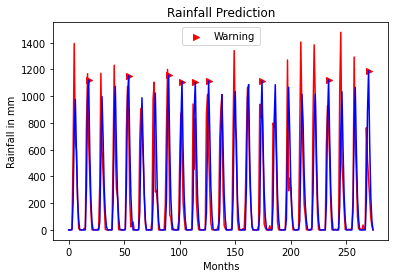

In [ ]:


dataset_total = pd.concat((dataset_train['RAINFALL_KONKAN & GOA'], dataset_test['RAINFALL_KONKAN & GOA']), axis = 0)

inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,335):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price[predicted_stock_price<0] = 0
print(predicted_stock_price)



results= []                                                        # Converting an array to list as further I have compiled the code in list.
for k in predicted_stock_price:
  results.append(k[0])
print(results)

c = []
for i in results:                                                  # for getting the accurate data which are above 700mm of rainfall
  if i >= 1100:
    c.append(i)
print(c)
p = [i for i,x in enumerate(results) if x >= 1100]                  # for getting the position of data where the data is above 700mm of rainfall
print(p)
for i in p:                                                        # for printing the months which are having rainfall above 700mm which may cause rainfall
  print(dt_1[i])


# Visualising the results
#KONKAN & GOA Original Rainfall Data
#KONKAN & GOA Predicted Rainfall Data
if i_val == 1:
  plt.plot(real_stock_price, color = 'red', label = '')
  plt.plot(predicted_stock_price, color = 'blue', label = '')
elif i_val == 2:
  plt.plot(real_stock_price, color = 'red', label = 'MADHYA MAHARASHTRA Original Rainfall Data')
  plt.plot(predicted_stock_price, color = 'blue', label = 'MADHYA MAHARASHTRA Predicted Rainfall Data')
elif i_val == 3:
  plt.plot(real_stock_price, color = 'red', label = 'MARATHVADA Original Rainfall Data')
  plt.plot(predicted_stock_price, color = 'blue', label = 'MARATHVADA Predicted Rainfall Data')
elif i_val == 4:
  plt.plot(real_stock_price, color = 'red', label = 'VIDHARBA Original Rainfall Data')
  plt.plot(predicted_stock_price, color = 'blue', label = 'VIDHARBA Predicted Rainfall Data')
elif i_val == 5:
  plt.plot(real_stock_price, color = 'red', label = 'CHHATTISGARH Original Rainfall Data')
  plt.plot(predicted_stock_price, color = 'blue', label = 'CHHATTISGARH Predicted Rainfall Data')
plt.scatter(p,c, marker='>',label='Warning', c='r')
plt.title('Rainfall Prediction')
plt.xlabel('Months')
plt.ylabel('Rainfall in mm')
plt.legend()
plt.show()